In [715]:
import pandas as pd
import numpy as np

In [716]:
df = pd.read_csv('spam.csv',encoding='latin1')

In [717]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3806,ham,Pls dont restrict her from eating anythin she ...,NaN,NaN,NaN
1050,ham,Are you available for soiree on June 3rd?,NaN,NaN,NaN
2461,ham,Anything lar...,NaN,NaN,NaN
1544,ham,After completed degree. There is no use in joi...,NaN,NaN,NaN
5287,ham,Hey ! Don't forget ... You are MINE ... For ME...,NaN,NaN,NaN


In [718]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [719]:
df.drop(columns = ['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [720]:
df.rename(columns = {'v1':'target','v2':'text'},inplace = True)
df.sample(5)

,target,text
843,spam,Urgent! call 09066350750 from your landline. Y...
1893,ham,Good Morning plz call me sir
3848,ham,U in town alone?
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...
4641,spam,You are being ripped off! Get your mobile cont...


In [721]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [722]:
df['target'] = encoder.fit_transform(df['target'])

In [723]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [724]:
df.isnull().sum()

,0
target,0
text,0


In [725]:
df.duplicated().sum()

403

In [726]:
df = df.drop_duplicates(keep = 'first')

In [727]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [728]:
df.shape

(5169, 2)

In [729]:
df['target'].value_counts()

,count
target,
0,4516
1,653


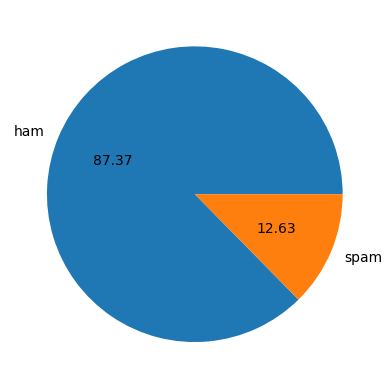

In [730]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels = ['ham','spam'],autopct = '%0.2f')
plt.show()

In [731]:
import nltk

In [732]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [733]:
df['text'].apply(len)

,text
0,111
1,29
2,155
3,49
4,61
...,...
5567,161
5568,37
5569,57
5570,125


In [734]:
df['num_characters'] = df['text'].apply(len)

In [735]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [736]:
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [737]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [738]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [739]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [740]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [741]:
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [742]:
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [743]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

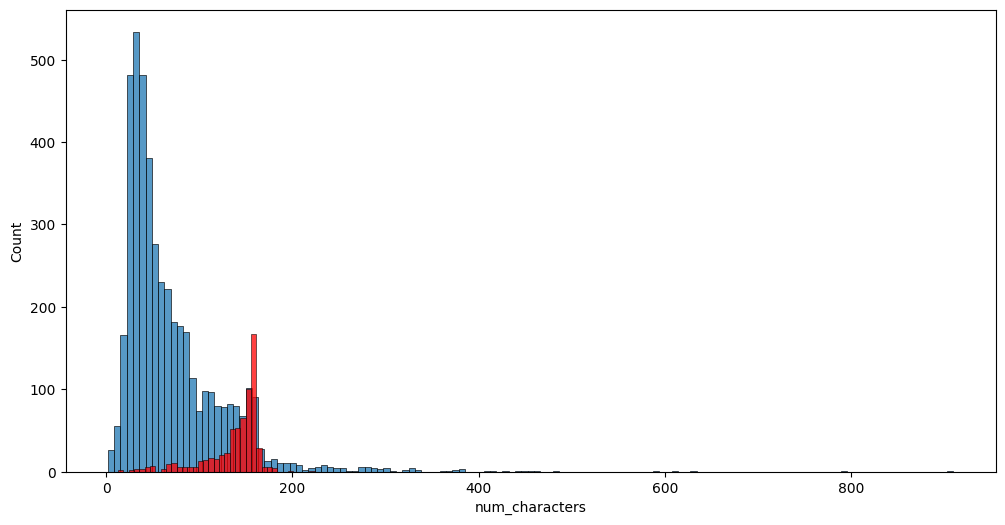

In [744]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

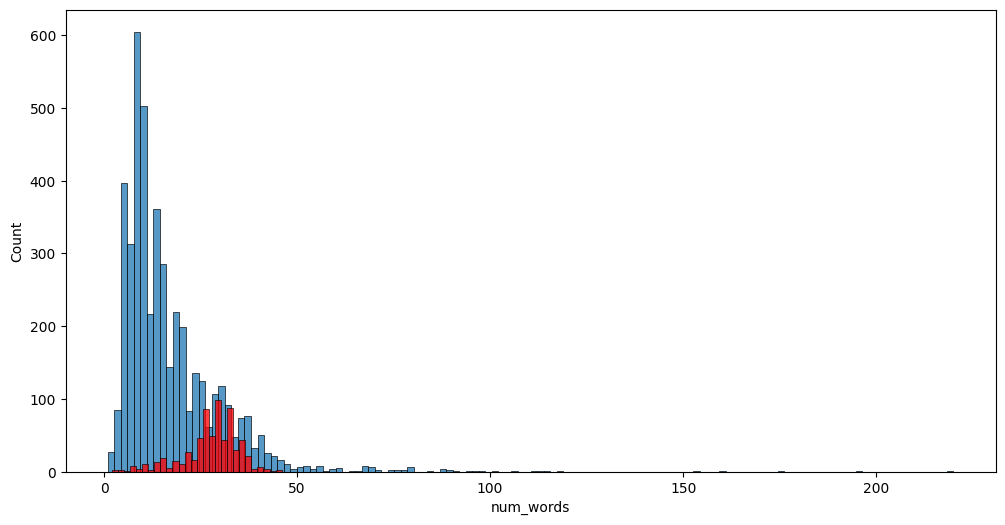

In [745]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

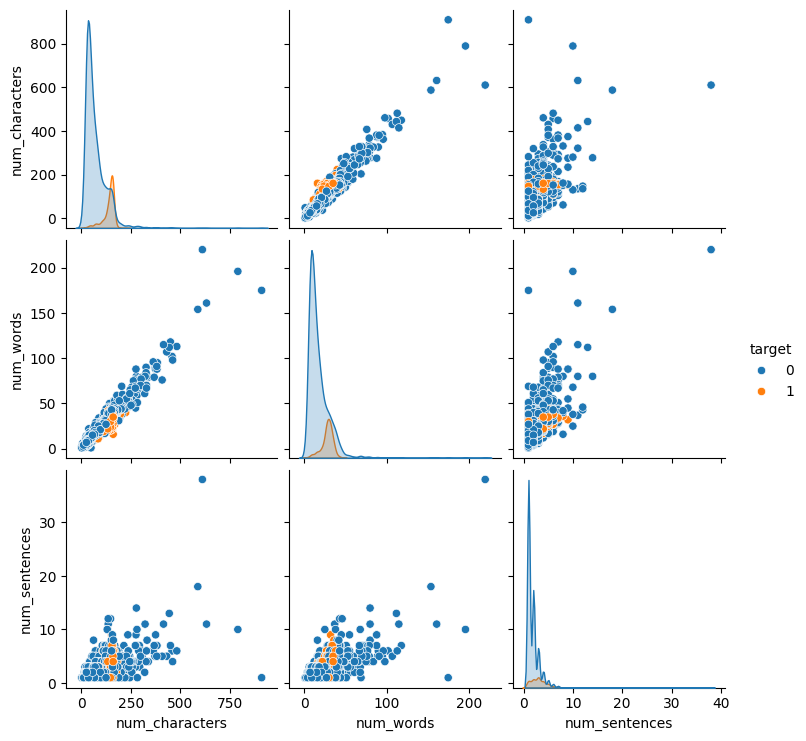

In [746]:
sns.pairplot(df,hue='target')

<Axes: >

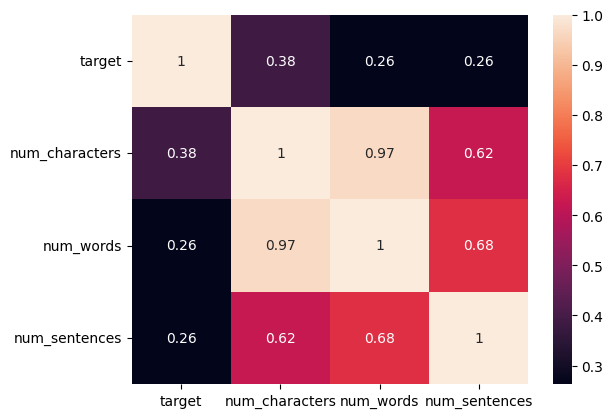

In [747]:
numerical_df = df[['target', 'num_characters', 'num_words','num_sentences']]
sns.heatmap(numerical_df.corr(),annot=True)

In [748]:
numerical_df

,target,num_characters,num_words,num_sentences
0,0,111,24,2
1,0,29,8,2
2,1,155,37,2
3,0,49,13,1
4,0,61,15,1
...,...,...,...,...
5567,1,161,35,4
5568,0,37,9,1
5569,0,57,15,2
5570,0,125,27,1


In [749]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [750]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [751]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()
  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [752]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loved')

'love'

In [753]:
df['transformed_text']=df['text'].apply(transform_text)

In [754]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height =500,min_font_size=10,background_color = 'white')

In [755]:
spam_wc = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=' '))

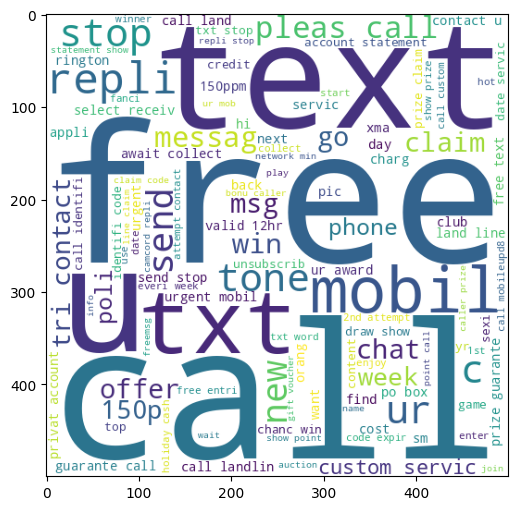

In [756]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [757]:
ham_wc = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

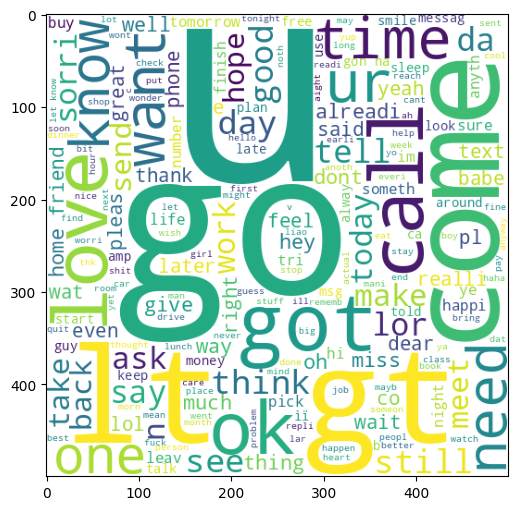

In [758]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [759]:
spam_corpus = []
for msg in df[df['target']==1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)

In [760]:
len(spam_corpus)

9939

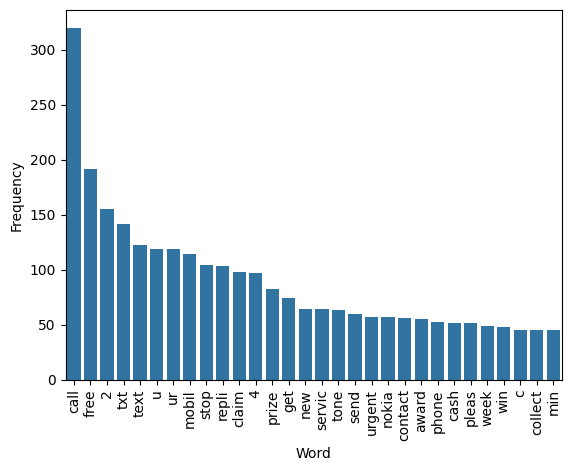

In [761]:
from collections import Counter
spam_df = pd.DataFrame(Counter(spam_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [762]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [763]:
len(ham_corpus)

35404

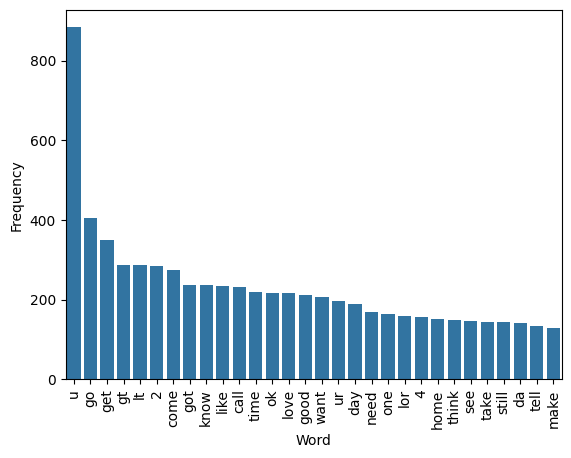

In [764]:
from collections import Counter
ham_df = pd.DataFrame(Counter(ham_corpus).most_common(30), columns=['Word', 'Frequency'])
sns.barplot(x='Word', y='Frequency', data=ham_df)
plt.xticks(rotation='vertical')
plt.show()

In [765]:
df

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [766]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
x = cv.fit_transform(df['transformed_text']).toarray()
x1 = tfidf.fit_transform(df['transformed_text']).toarray()

In [767]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x1 = scaler.fit_transform(x1)

In [768]:
x1 = np.hstack((x1,df['num_characters'].values.reshape(-1,1)))

In [769]:
x.shape
x1.shape

(5169, 3001)

In [770]:
y = df['target'].values

In [771]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [772]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=2)
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y,test_size = 0.2,random_state=2)

In [773]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [774]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [775]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8800773694390716
[[792 104]
 [ 20 118]]
0.5315315315315315


In [776]:
mnb.fit(x_train,y_train)
y_pred2 = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9642166344294004
[[871  25]
 [ 12 126]]
0.8344370860927153


In [777]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9700193423597679
[[893   3]
 [ 28 110]]
0.9734513274336283


In [778]:
gnb.fit(x_train1,y_train1)
y_pred4 = gnb.predict(x_test1)
print(accuracy_score(y_test1,y_pred4))
print(confusion_matrix(y_test1,y_pred4))
print(precision_score(y_test1,y_pred4))

0.8907156673114119
[[800  96]
 [ 17 121]]
0.5576036866359447


In [779]:
mnb.fit(x_train1,y_train1)
y_pred5 = mnb.predict(x_test1)
print(accuracy_score(y_test1,y_pred5))
print(confusion_matrix(y_test1,y_pred5))
print(precision_score(y_test1,y_pred5))

0.9738878143133463
[[890   6]
 [ 21 117]]
0.9512195121951219


In [780]:
bnb.fit(x_train1,y_train1)
y_pred6 = bnb.predict(x_test1)
print(accuracy_score(y_test1,y_pred6))
print(confusion_matrix(y_test1,y_pred6))
print(precision_score(y_test1,y_pred6))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [781]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [782]:
svc = SVC(kernel='sigmoid',gamma = 1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth = 5)
lrc = LogisticRegression(solver = 'liblinear',penalty = 'l1')
rfc = RandomForestClassifier(n_estimators = 50,random_state = 2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc  = BaggingClassifier(n_estimators = 50,random_state = 2)
etc = ExtraTreesClassifier(n_estimators = 50,random_state = 2)
gbdt = GradientBoostingClassifier(n_estimators = 50,random_state = 2)
xgb = XGBClassifier(n_estimators = 50,random_state = 2)

In [783]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [784]:
def train_classifier(clf,x_train1,y_train1,x_test1,y_test1):
    clf.fit(x_train1,y_train1)
    y_pred = clf.predict(x_test1)
    accuracy = accuracy_score(y_test1,y_pred)
    precision = precision_score(y_test1,y_pred)

    return accuracy,precision

In [785]:
train_classifier(svc,x_train1,y_train1,x_test1,y_test1)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.8665377176015474, 0.0)

In [786]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, x_train1,y_train1,x_test1,y_test1)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


For  SVC
Accuracy -  0.8665377176015474
Precision -  0.0
For  KN
Accuracy -  0.8858800773694391
Precision -  0.8333333333333334
For  NB
Accuracy -  0.9738878143133463
Precision -  0.9512195121951219
For  DT
Accuracy -  0.9439071566731141
Precision -  0.8773584905660378
For  LR
Accuracy -  0.965183752417795
Precision -  0.9553571428571429
For  RF
Accuracy -  0.9690522243713733
Precision -  0.9818181818181818
For  AdaBoost
Accuracy -  0.9642166344294004
Precision -  0.9316239316239316
For  BgC
Accuracy -  0.9661508704061895
Precision -  0.8992248062015504
For  ETC
Accuracy -  0.9787234042553191
Precision -  0.9754098360655737
For  GBDT
Accuracy -  0.9516441005802708
Precision -  0.9313725490196079
For  xgb
Accuracy -  0.9690522243713733
Precision -  0.9416666666666667


In [787]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Accuracy',ascending=False)

In [788]:
performance_df

,Algorithm,Accuracy,Precision
8,ETC,0.978723,0.975410
2,NB,0.973888,0.951220
5,RF,0.969052,0.981818
10,xgb,0.969052,0.941667
7,BgC,0.966151,0.899225
4,LR,0.965184,0.955357
6,AdaBoost,0.964217,0.931624
9,GBDT,0.951644,0.931373
3,DT,0.943907,0.877358
1,KN,0.885880,0.833333


In [789]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [790]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,0.969052,0.981818
8,ETC,0.978723,0.975410
4,LR,0.965184,0.955357
2,NB,0.973888,0.951220
10,xgb,0.969052,0.941667
6,AdaBoost,0.964217,0.931624
9,GBDT,0.951644,0.931373
7,BgC,0.966151,0.899225
3,DT,0.943907,0.877358
1,KN,0.885880,0.833333


In [791]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [792]:
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,0.969052
1,ETC,Accuracy,0.978723
2,LR,Accuracy,0.965184
3,NB,Accuracy,0.973888
4,xgb,Accuracy,0.969052
5,AdaBoost,Accuracy,0.964217
6,GBDT,Accuracy,0.951644
7,BgC,Accuracy,0.966151
8,DT,Accuracy,0.943907
9,KN,Accuracy,0.885880


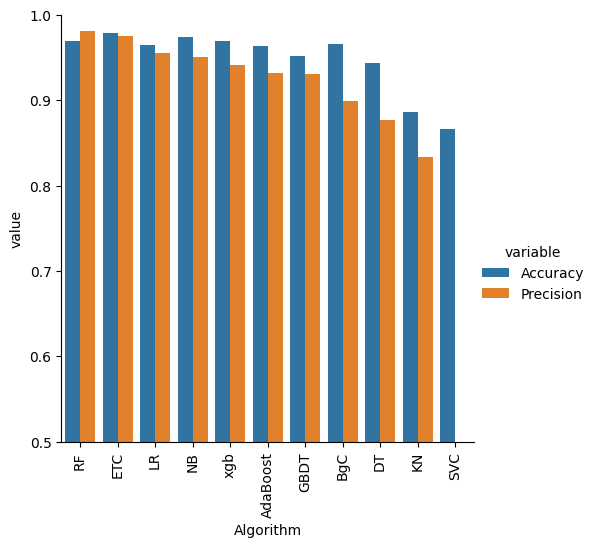

In [793]:
sns.catplot(x = 'Algorithm', y='value',
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [794]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [795]:
performance_df.merge(temp_df,on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,RF,0.969052,0.981818,0.969052,0.981818
1,ETC,0.978723,0.975410,0.978723,0.975410
2,LR,0.965184,0.955357,0.965184,0.955357
3,NB,0.973888,0.951220,0.973888,0.951220
4,xgb,0.969052,0.941667,0.969052,0.941667
5,AdaBoost,0.964217,0.931624,0.964217,0.931624
6,GBDT,0.951644,0.931373,0.951644,0.931373
7,BgC,0.966151,0.899225,0.966151,0.899225
8,DT,0.943907,0.877358,0.943907,0.877358
9,KN,0.885880,0.833333,0.885880,0.833333


In [799]:
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [800]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [801]:
voting.fit(x_train1,y_train1)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [795]:
y_pred = voting.predict(x_test1)
print("Accuracy",accuracy_score(y_test1,y_pred))
print("Precision",precision_score(y_test1,y_pred))

In [795]:
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [795]:
from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [796]:
clf.fit(x_train1,y_train1)
y_pred = clf.predict(x_test1)
print("Accuracy",accuracy_score(y_test1,y_pred))
print("Precision",precision_score(y_test1,y_pred))

Accuracy 0.9690522243713733
Precision 0.9416666666666667


In [802]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))